# Data Clean and Prepare for Model Training and testing

In [ ]:
#!pip install -Uqq pandas

## Importing necessary libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# List contents of your My Drive
!ls /content/drive/MyDrive/

 Banner_images	 DATA  'DS CLASS'   DS_PROJECTS   PROJECTS


In [ ]:
%cd /content/drive/MyDrive/DS_PROJECTS/AI_Powered_Tag_Recommendation_for_Stack_Overflow

/content/drive/MyDrive/DS_PROJECTS/AI_Powered_Tag_Recommendation_for_Stack_Overflow


In [ ]:
!ls /content/drive/MyDrive/DS_PROJECTS/AI_Powered_Tag_Recommendation_for_Stack_Overflow

data  data_preparetion.ipynb  feasibility_testing


In [ ]:
import os
cwd = os.getcwd()
cwd

'/content/drive/MyDrive/DS_PROJECTS/AI_Powered_Tag_Recommendation_for_Stack_Overflow'

In [ ]:
RAW_DATA_FILE_PATH = os.path.join(cwd, 'data/raw_data_of_stackoverflow.csv')
RAW_DATA_FILE_PATH

'/content/drive/MyDrive/DS_PROJECTS/AI_Powered_Tag_Recommendation_for_Stack_Overflow/data/raw_data/raw_data_of_stackoverflow.csv'

In [ ]:
df = pd.read_csv(RAW_DATA_FILE_PATH)
df.head(5)

,question,links,summary,answers,votes,tags
0,MQTT what is the purpose or usage of Last Will...,https://stackoverflow.com/questions/17270863,I'm surely missing something about how the who...,3,43,"protocols, mqtt"
1,Parsing JSON objects for HTML table,https://stackoverflow.com/questions/17066636,"I am trying to display a ""leaderboard"" table b...",13,43,"javascript, jquery, html, arrays, json"
2,ListPopupWindow not obeying WRAP_CONTENT width...,https://stackoverflow.com/questions/14200724,I'm trying to use ListPopupWindow to show a li...,10,43,"android, user-interface, popupwindow"
3,Sum of list of lists; returns sum list,https://stackoverflow.com/questions/13783315,"Let data = [[3,7,2],[1,4,5],[9,8,7]] Let's say...",11,43,"python, list, matrix, sum"
4,Convert from Long to date format,https://stackoverflow.com/questions/11773369,I want to convert Long value to String or Date...,6,43,"android, date, long-integer"


In [ ]:
df.shape

(239150, 6)

In [ ]:
df.drop(["links","answers","votes"],axis=1,inplace=True)
df.head(5)

,question,summary,tags
0,MQTT what is the purpose or usage of Last Will...,I'm surely missing something about how the who...,"protocols, mqtt"
1,Parsing JSON objects for HTML table,"I am trying to display a ""leaderboard"" table b...","javascript, jquery, html, arrays, json"
2,ListPopupWindow not obeying WRAP_CONTENT width...,I'm trying to use ListPopupWindow to show a li...,"android, user-interface, popupwindow"
3,Sum of list of lists; returns sum list,"Let data = [[3,7,2],[1,4,5],[9,8,7]] Let's say...","python, list, matrix, sum"
4,Convert from Long to date format,I want to convert Long value to String or Date...,"android, date, long-integer"


In [ ]:
df.insert(2, 'question_summary', df['question'] + ' ' + df['summary'])
df.head(5)

,question,summary,question_summary,tags
0,MQTT what is the purpose or usage of Last Will...,I'm surely missing something about how the who...,MQTT what is the purpose or usage of Last Will...,"protocols, mqtt"
1,Parsing JSON objects for HTML table,"I am trying to display a ""leaderboard"" table b...",Parsing JSON objects for HTML table I am tryin...,"javascript, jquery, html, arrays, json"
2,ListPopupWindow not obeying WRAP_CONTENT width...,I'm trying to use ListPopupWindow to show a li...,ListPopupWindow not obeying WRAP_CONTENT width...,"android, user-interface, popupwindow"
3,Sum of list of lists; returns sum list,"Let data = [[3,7,2],[1,4,5],[9,8,7]] Let's say...",Sum of list of lists; returns sum list Let dat...,"python, list, matrix, sum"
4,Convert from Long to date format,I want to convert Long value to String or Date...,Convert from Long to date format I want to con...,"android, date, long-integer"


In [ ]:
df.drop(["question","summary"],axis=1,inplace=True)
df.head(5)

,question_summary,tags
0,MQTT what is the purpose or usage of Last Will...,"protocols, mqtt"
1,Parsing JSON objects for HTML table I am tryin...,"javascript, jquery, html, arrays, json"
2,ListPopupWindow not obeying WRAP_CONTENT width...,"android, user-interface, popupwindow"
3,Sum of list of lists; returns sum list Let dat...,"python, list, matrix, sum"
4,Convert from Long to date format I want to con...,"android, date, long-integer"


In [ ]:
df.isna().sum()

,0
question_summary,0
tags,0


## Clean & parse label column (comma-separated)

In [ ]:
def parse_label_string(label_str):
  if pd.isna(label_str) or str(label_str).strip()=="":
    return []
  return [item.strip() for item in label_str.split(',') if item.strip()!=""]

In [ ]:
# Split the tags into lists
df['tags_list'] = df['tags'].apply(parse_label_string)
df.head(5)

,question_summary,tags,tags_list
0,MQTT what is the purpose or usage of Last Will...,"protocols, mqtt","[protocols, mqtt]"
1,Parsing JSON objects for HTML table I am tryin...,"javascript, jquery, html, arrays, json","[javascript, jquery, html, arrays, json]"
2,ListPopupWindow not obeying WRAP_CONTENT width...,"android, user-interface, popupwindow","[android, user-interface, popupwindow]"
3,Sum of list of lists; returns sum list Let dat...,"python, list, matrix, sum","[python, list, matrix, sum]"
4,Convert from Long to date format I want to con...,"android, date, long-integer","[android, date, long-integer]"


In [ ]:
texts = df['question_summary'].astype(str).tolist()
texts[:5]

["MQTT what is the purpose or usage of Last Will Testament? I'm surely missing something about how the whole MQTT protocol works, as I can't grasp the usage pattern of Last Will Testament messages: what's their purpose? One example I often see is about ...",
 'Parsing JSON objects for HTML table I am trying to display a "leaderboard" table based on JSON data. I have read a lot about the JSON format and overcome some initial obstacles, but my Javascript knowledge is very limited and I need ...',
 "ListPopupWindow not obeying WRAP_CONTENT width spec I'm trying to use ListPopupWindow to show a list of strings via an ArrayAdapter (eventually this will be a more complex custom adapter). Code is below. As shown in the screenshot, the resulting ...",
 "Sum of list of lists; returns sum list Let data = [[3,7,2],[1,4,5],[9,8,7]] Let's say I want to sum the elements for the indices of each list in the list, like adding numbers in a matrix column to get a single list. I am assuming that all ...",

In [ ]:
tags_label = df['tags_list'].tolist()
tags_label[:5]

[['protocols', 'mqtt'],
 ['javascript', 'jquery', 'html', 'arrays', 'json'],
 ['android', 'user-interface', 'popupwindow'],
 ['python', 'list', 'matrix', 'sum'],
 ['android', 'date', 'long-integer']]

# Binarize labels (Multi-hot)
- MultiLabelBinarizer converts a list of labels into 0/1 format (one-hot encoding for multi-label).

In [ ]:
# Apply MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(tags_label)
print(Y.shape)
num_labels = Y.shape[1]
print(num_labels)
print("Labels:", mlb.classes_)


(239150, 21160)
21160
Labels: ['.a' '.app' '.aspxauth' ... 'zurb-foundation-6' 'zxing' 'zynq']


In [ ]:
from collections import Counter

In [ ]:
# Flatten all tags and count frequencies
all_tags = [tag for tags_list in tags_label for tag in tags_list]

           tag  count
0       python  24304
1   javascript  21737
2         java  20042
3           c#  17864
4      android  15786
5          c++  10154
6         html   8975
7          php   7759
8          ios   7619
9          css   7383
10        .net   6820
11      jquery   6608
12         git   6139
13         sql   5031
14     node.js   4856
15           c   4485
16       mysql   4126
17      string   3708
18       linux   3586
19     reactjs   3583


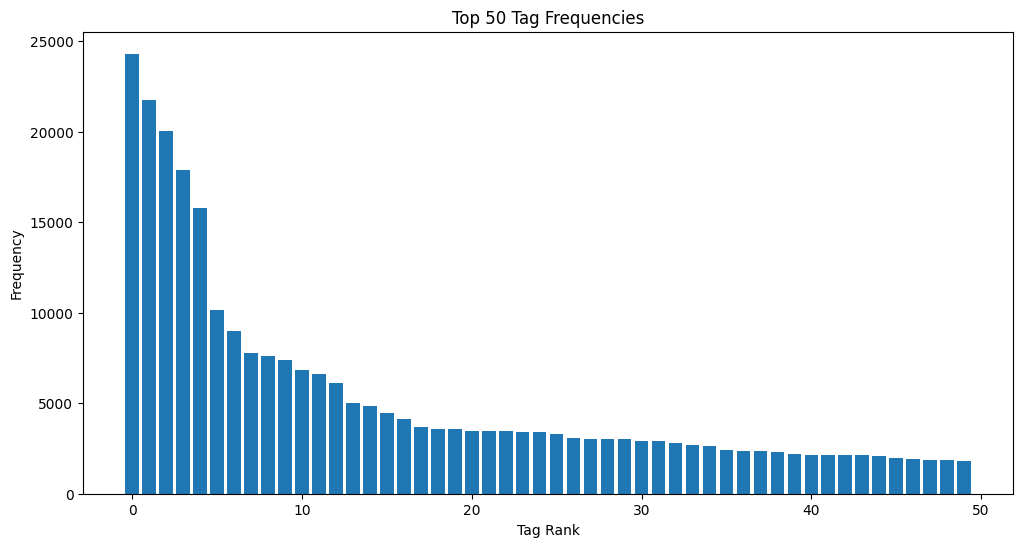

In [ ]:
# See the distribution
tag_counts = Counter(all_tags)
df_tags = pd.DataFrame(tag_counts.most_common(100), columns=['tag', 'count'])
print(df_tags.head(20))

# Plot distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(range(50), [count for tag, count in tag_counts.most_common(50)])
plt.xlabel('Tag Rank')
plt.ylabel('Frequency')
plt.title('Top 50 Tag Frequencies')
plt.show()

In [ ]:
# Check distribution
print(f"Total unique tags: {len(tag_counts)}")
print(f"Tags appearing once: {sum(1 for count in tag_counts.values() if count == 1)}")
print(f"Tags appearing < 10 times: {sum(1 for count in tag_counts.values() if count < 10)}")
print(f"Tags appearing < 100 times: {sum(1 for count in tag_counts.values() if count < 100)}")

# Most common tags
print("\nTop 100 tags:")
for tag, count in tag_counts.most_common(100):
    print(f"{tag}: {count}")

Total unique tags: 21160
Tags appearing once: 6945
Tags appearing < 10 times: 15848
Tags appearing < 100 times: 20216

Top 100 tags:
python: 24304
javascript: 21737
java: 20042
c#: 17864
android: 15786
c++: 10154
html: 8975
php: 7759
ios: 7619
css: 7383
.net: 6820
jquery: 6608
git: 6139
sql: 5031
node.js: 4856
c: 4485
mysql: 4126
string: 3708
linux: 3586
reactjs: 3583
swift: 3480
arrays: 3457
objective-c: 3437
ruby-on-rails: 3398
r: 3383
ruby: 3296
django: 3075
bash: 3047
sql-server: 3035
iphone: 2998
json: 2929
angular: 2902
typescript: 2816
xcode: 2669
asp.net: 2613
windows: 2394
pandas: 2387
docker: 2361
regex: 2279
postgresql: 2203
angularjs: 2142
asp.net-mvc: 2139
spring: 2117
visual-studio: 2113
macos: 2070
performance: 2000
eclipse: 1913
database: 1881
unit-testing: 1855
python-3.x: 1792
flutter: 1773
shell: 1767
github: 1675
multithreading: 1666
list: 1661
android-studio: 1638
c++11: 1601
wpf: 1572
algorithm: 1532
go: 1510
visual-studio-code: 1459
numpy: 1444
amazon-web-service

In [ ]:
# Start with top 100 tags
top_n = 100

# Get top 100
selected_tags = [tag for tag, count in tag_counts.most_common(top_n)]

print(f"Top {top_n} tags selected")
print(f"Frequency range: {tag_counts[selected_tags[0]]} to {tag_counts[selected_tags[-1]]}")

# Filter your data
filtered_tags = [[tag for tag in tags_list if tag in selected_tags]
                 for tags_list in tags_label]

# Check how many questions have NO tags after filtering
no_tags = sum(1 for tags in filtered_tags if len(tags) == 0)
print(f"Questions with no tags after filtering: {no_tags} ({no_tags/len(filtered_tags)*100:.2f}%)")

# Optionally: Remove questions with no tags
# if no_tags > 0:
#     print(f"\nConsider removing {no_tags} questions with no valid tags")
#     # valid_indices = [i for i, tags in enumerate(filtered_tags) if len(tags) > 0]
#     # filtered_tags = [filtered_tags[i] for i in valid_indices]
#     # df = df.iloc[valid_indices].reset_index(drop=True)



Top 100 tags selected
Frequency range: 24304 to 923
Questions with no tags after filtering: 28494 (11.91%)


In [ ]:
df['filtered_tags'] = filtered_tags
df['num_filtered_tags'] = df['filtered_tags'].apply(len)
df.head(10)

,question_summary,tags,tags_list,filtered_tags,num_filtered_tags
0,MQTT what is the purpose or usage of Last Will...,"protocols, mqtt","[protocols, mqtt]",[],0
1,Parsing JSON objects for HTML table I am tryin...,"javascript, jquery, html, arrays, json","[javascript, jquery, html, arrays, json]","[javascript, jquery, html, arrays, json]",5
2,ListPopupWindow not obeying WRAP_CONTENT width...,"android, user-interface, popupwindow","[android, user-interface, popupwindow]",[android],1
3,Sum of list of lists; returns sum list Let dat...,"python, list, matrix, sum","[python, list, matrix, sum]","[python, list]",2
4,Convert from Long to date format I want to con...,"android, date, long-integer","[android, date, long-integer]","[android, date]",2
5,Removing Windows newlines on Linux (sed vs. aw...,"linux, sed, awk","[linux, sed, awk]",[linux],1
6,"success_url in UpdateView, based on passed val...","django, django-class-based-views","[django, django-class-based-views]",[django],1
7,JSON.net Serialize C# object to JSON Issue I a...,"c#, asp.net-mvc, serialization, json.net","[c#, asp.net-mvc, serialization, json.net]","[c#, asp.net-mvc]",2
8,Android: Programmatically detect if device has...,"android, menu, key, hardware","[android, menu, key, hardware]",[android],1
9,NSLocale and country name I used this code for...,"iphone, objective-c","[iphone, objective-c]","[iphone, objective-c]",2


In [ ]:
df_with_tags = df[df['num_filtered_tags'] > 0].copy()
df_with_tags.head(5)

,question_summary,tags,tags_list,filtered_tags,num_filtered_tags
1,Parsing JSON objects for HTML table I am tryin...,"javascript, jquery, html, arrays, json","[javascript, jquery, html, arrays, json]","[javascript, jquery, html, arrays, json]",5
2,ListPopupWindow not obeying WRAP_CONTENT width...,"android, user-interface, popupwindow","[android, user-interface, popupwindow]",[android],1
3,Sum of list of lists; returns sum list Let dat...,"python, list, matrix, sum","[python, list, matrix, sum]","[python, list]",2
4,Convert from Long to date format I want to con...,"android, date, long-integer","[android, date, long-integer]","[android, date]",2
5,Removing Windows newlines on Linux (sed vs. aw...,"linux, sed, awk","[linux, sed, awk]",[linux],1


In [ ]:
df_with_tags.shape

(210656, 5)

In [ ]:
# Apply MultiLabelBinarizer on the filtered tags
mlb_filtered = MultiLabelBinarizer()
Y_filtered = mlb_filtered.fit_transform(df_with_tags['filtered_tags'])

print(Y_filtered.shape)
print("Labels for filtered tags:", mlb_filtered.classes_)

(210656, 100)
Labels for filtered tags: ['.net' 'ajax' 'algorithm' 'amazon-web-services' 'android'
 'android-studio' 'angular' 'angularjs' 'arrays' 'asp.net' 'asp.net-core'
 'asp.net-mvc' 'bash' 'c' 'c#' 'c++' 'c++11' 'cocoa-touch' 'css' 'dart'
 'database' 'dataframe' 'date' 'datetime' 'debugging' 'dictionary'
 'django' 'docker' 'eclipse' 'entity-framework' 'exception' 'file'
 'flutter' 'function' 'git' 'github' 'go' 'google-chrome' 'gradle' 'html'
 'http' 'image' 'intellij-idea' 'ios' 'iphone' 'java' 'javascript'
 'jquery' 'json' 'kotlin' 'laravel' 'linq' 'linux' 'list' 'macos'
 'matplotlib' 'maven' 'mongodb' 'multithreading' 'mysql' 'node.js' 'npm'
 'numpy' 'objective-c' 'oop' 'pandas' 'performance' 'php' 'postgresql'
 'powershell' 'python' 'python-3.x' 'r' 'react-native' 'reactjs' 'regex'
 'rest' 'ruby' 'ruby-on-rails' 'scala' 'shell' 'spring' 'spring-boot'
 'sql' 'sql-server' 'string' 'swift' 't-sql' 'twitter-bootstrap'
 'typescript' 'ubuntu' 'unit-testing' 'unix' 'vim' 'visual-stu

In [ ]:
# Create a DataFrame from the one-hot encoded labels with appropriate column names
tags_df = pd.DataFrame(Y_filtered, columns=mlb_filtered.classes_)

# Reset the index of df_with_tags before concatenating to avoid index mismatch
df_with_tags = df_with_tags.reset_index(drop=True)

# Concatenate the original DataFrame with the one-hot encoded tags DataFrame
df_encoded = pd.concat([df_with_tags, tags_df], axis=1)

display(df_encoded.head())

,question_summary,tags,tags_list,filtered_tags,num_filtered_tags,.net,ajax,algorithm,amazon-web-services,android,...,ubuntu,unit-testing,unix,vim,visual-studio,visual-studio-code,windows,wpf,xcode,xml
0,Parsing JSON objects for HTML table I am tryin...,"javascript, jquery, html, arrays, json","[javascript, jquery, html, arrays, json]","[javascript, jquery, html, arrays, json]",5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ListPopupWindow not obeying WRAP_CONTENT width...,"android, user-interface, popupwindow","[android, user-interface, popupwindow]",[android],1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Sum of list of lists; returns sum list Let dat...,"python, list, matrix, sum","[python, list, matrix, sum]","[python, list]",2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Convert from Long to date format I want to con...,"android, date, long-integer","[android, date, long-integer]","[android, date]",2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Removing Windows newlines on Linux (sed vs. aw...,"linux, sed, awk","[linux, sed, awk]",[linux],1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.drop(["tags","tags_list","filtered_tags","num_filtered_tags"],axis=1,inplace=True)
display(df_encoded.head(5))

,question_summary,.net,ajax,algorithm,amazon-web-services,android,android-studio,angular,angularjs,arrays,...,ubuntu,unit-testing,unix,vim,visual-studio,visual-studio-code,windows,wpf,xcode,xml
0,Parsing JSON objects for HTML table I am tryin...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,ListPopupWindow not obeying WRAP_CONTENT width...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Sum of list of lists; returns sum list Let dat...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Convert from Long to date format I want to con...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Removing Windows newlines on Linux (sed vs. aw...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.shape

(210656, 101)

## Stratified splitting -> For multi-label dataset

**Stratified splitting → every label (even rare ones) gets represented in all sets.**

Since we have a multi-label dataset (100 MultiLabelBinarizer labels), the best way is to:

Using iterative stratification (MultilabelStratifiedShuffleSplit) to preserve label distribution.

**Making 3 files:**

- train.csv (~180k rows)

- val.csv (~20k rows)

- test.csv (~10.6k rows, unseen for inference)

In [ ]:
! pip install iterative-stratification

In [ ]:
import numpy as np
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

In [ ]:
X = df_encoded['question_summary'].values
y = df_encoded.drop('question_summary', axis=1).values
n_samples = len(df_encoded)

### Split Train vs Temp (Val+Test)

In [ ]:
temp_size = 30656  # 20k val + 10.6k test
msss1 = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=temp_size, random_state=42)
train_idx, temp_idx = next(msss1.split(X, y))

In [ ]:
len(train_idx), len(temp_idx)

(179903, 30753)

### Split Temp into Val vs Test

In [ ]:
test_size = 10750
msss2 = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
val_idx, test_idx = next(msss2.split(X[temp_idx], y[temp_idx]))
len(val_idx), len(test_idx)

(20015, 10738)

### Create Final Dataframe

In [ ]:
train_df = df_encoded.iloc[train_idx].reset_index(drop=True)
val_df   = df_encoded.iloc[val_idx].reset_index(drop=True)
test_df  = df_encoded.iloc[test_idx].reset_index(drop=True)

print("Train:", train_df.shape)
print("Val:", val_df.shape)
print("Test:", test_df.shape)

Train: (179903, 101)
Val: (20015, 101)
Test: (10738, 101)


In [ ]:
train_df.head(5)

,question_summary,.net,ajax,algorithm,amazon-web-services,android,android-studio,angular,angularjs,arrays,...,ubuntu,unit-testing,unix,vim,visual-studio,visual-studio-code,windows,wpf,xcode,xml
0,Parsing JSON objects for HTML table I am tryin...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,ListPopupWindow not obeying WRAP_CONTENT width...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Convert from Long to date format I want to con...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Removing Windows newlines on Linux (sed vs. aw...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,JSON.net Serialize C# object to JSON Issue I a...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Save to CSV

In [ ]:
train_df.to_csv("data/train.csv", index=False)
val_df.to_csv("data/val.csv", index=False)
test_df.to_csv("data/test.csv", index=False)